# Load our Data

In [1]:
import numpy as np
import pandas as pd

care_management_url='C:/Users/Sumner/2022_datathon/data/care_management_anonymized.csv'
care_info_url='C:/Users/Sumner/2022_datathon/data/client_info_anonymized.csv'
donations_url='C:/Users/Sumner/2022_datathon/data/donations_anonymized.csv'
pantry_url='C:/Users/Sumner/2022_datathon/data/pantry_anonymized.csv'
volunteer_services_url='C:/Users/Sumner/2022_datathon/data/volunteer_services_anonymized.csv'

care_management = pd.read_csv(care_management_url)
care_info= pd.read_csv(care_info_url)
donations= pd.read_csv(donations_url)
pantry = pd.read_csv(pantry_url)
volunteer_services = pd.read_csv(volunteer_services_url)

# Create a pared down Care Management Table that only tracks direct interactions with clients

In [2]:
direct_care = care_management[care_management['assistance_category'] != 'Remote Contact w/o client']
direct_care = direct_care[direct_care['assistance_category'] != 'Internal Discussions']

# Create three series that group clients by their number of appearances in the Pantry Data, the Rides Data, and our pared down Care Management Data

In [3]:
pantry_uses = pantry.groupby(['anon_ID'])['assistance_date'].count()
ride_uses = volunteer_services.groupby(['anon_ID'])['appt_date'].count() 
care_uses = direct_care.groupby(['anon_ID'])['assistance_date'].count()

# Add across these three series to create a series tracking the total direct utilizations of each client



In [4]:
utilization = pantry_uses.add(ride_uses, fill_value=0)
utilization = utilization.add(care_uses, fill_value=0)

# Visualize these utilizations of service (I have no experience with visualization. Could use some help with this)

<AxesSubplot:ylabel='Frequency'>

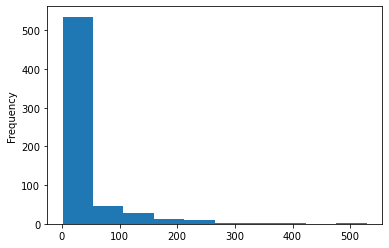

In [5]:
utilization.plot(kind='hist')

# Takeaway 1

Over the course of two and a half years, and in the midst of unprecedented obstacles, ElderNet was able to record a remarkable 21,504 instances of direct aid given to 641 clients, 386 of which were living in poverty.

In [6]:
utilization.sum()

21504.0

In [7]:
utilization.count()

641

In [8]:
care_info[care_info['poverty']== 'Yes'].poverty.count()

386

# Takeaway 2

The services offered by ElderNet were returned to time and again by clients, proving not only their utility, but their availability. 119 clients took advantage of services 50 or more times, and 66 used them 100 or more times.

In [9]:
utilization[utilization > 49].count()

119

In [10]:
utilization[utilization > 99].count()

66